In [ ]:
if target_max_col in df_up.columns and len(model2_1_results) > 0:
    # 결과 DataFrame으로 정리
    df_model2_1_results = pd.DataFrame(model2_1_results)
    
    print("=" * 80)
    print("Model 2-1: 상승 케이스 고가 예측 모델 성능 비교")
    print("=" * 80)
    
    # Test Set 결과만 출력
    df_model2_1_test = df_model2_1_results[df_model2_1_results['dataset'] == 'Test'].copy()
    df_model2_1_test = df_model2_1_test.sort_values('mae')
    
    print("\n[Test Set 성능]")
    print(df_model2_1_test[['model', 'mae', 'rmse', 'r2', 'direction_accuracy']].to_string(index=False))
    
    # 최고 성능 모델
    best_model2_1_name = df_model2_1_test.iloc[0]['model']
    print(f"\n✅ 최고 성능 모델: {best_model2_1_name} (MAE 기준)")
    
    # Model 2 vs 2-1 비교
    print("\n" + "=" * 80)
    print("Model 2 (종가) vs Model 2-1 (고가) 비교")
    print("=" * 80)
    
    print("\n[Best Models 성능 비교]")
    print(f"\nModel 2 (종가, {best_model2_name}):")
    print(f"  Test MAE: {df_model2_test.iloc[0]['mae']:.4f}%")
    print(f"  Test RMSE: {df_model2_test.iloc[0]['rmse']:.4f}%")
    print(f"  Test R²: {df_model2_test.iloc[0]['r2']:.4f}")
    
    print(f"\nModel 2-1 (고가, {best_model2_1_name}):")
    print(f"  Test MAE: {df_model2_1_test.iloc[0]['mae']:.4f}%")
    print(f"  Test RMSE: {df_model2_1_test.iloc[0]['rmse']:.4f}%")
    print(f"  Test R²: {df_model2_1_test.iloc[0]['r2']:.4f}")
    
    print(f"\n차이 (Model 2-1 - Model 2):")
    print(f"  MAE 차이: {df_model2_1_test.iloc[0]['mae'] - df_model2_test.iloc[0]['mae']:+.4f}%p")
    print(f"  RMSE 차이: {df_model2_1_test.iloc[0]['rmse'] - df_model2_test.iloc[0]['rmse']:+.4f}%p")
    print(f"  R² 차이: {df_model2_1_test.iloc[0]['r2'] - df_model2_test.iloc[0]['r2']:+.4f}")
    
    # 시각화
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # MAE 비교
    models = ['종가 (Model 2)', '고가 (Model 2-1)']
    mae_values = [df_model2_test.iloc[0]['mae'], df_model2_1_test.iloc[0]['mae']]
    
    axes[0].bar(models, mae_values, alpha=0.7, edgecolor='black', color=['green', 'blue'])
    axes[0].set_ylabel('MAE (%)')
    axes[0].set_title('Model 2 vs 2-1: MAE 비교 (Test Set)')
    axes[0].grid(True, alpha=0.3)
    
    for i, v in enumerate(mae_values):
        axes[0].text(i, v + 0.1, f'{v:.2f}%', ha='center')
    
    # 예측값 vs 실제값 분포 비교
    best_model2_1 = model2_1_models[best_model2_1_name]
    y_up_max_test_pred_best = best_model2_1.predict(X_up_max_test)
    
    # 샘플링
    sample_size = min(1000, len(y_up_test))
    sample_idx = np.random.choice(len(y_up_test), sample_size, replace=False)
    
    axes[1].scatter(y_up_test.iloc[sample_idx], y_up_test_pred_best[sample_idx], 
                   alpha=0.4, s=20, label='종가 (Model 2)', color='green')
    axes[1].scatter(y_up_max_test.iloc[sample_idx], y_up_max_test_pred_best[sample_idx], 
                   alpha=0.4, s=20, label='고가 (Model 2-1)', color='blue')
    axes[1].plot([0, 30], [0, 30], 'r--', lw=2, label='Perfect Prediction')
    axes[1].set_xlabel('실제 수익률 (%)')
    axes[1].set_ylabel('예측 수익률 (%)')
    axes[1].set_title('Model 2 vs 2-1: 예측 vs 실제')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim(0, 30)
    axes[1].set_ylim(0, 30)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("⚠ Model 2-1 결과 없음")

### 3-B.3 Model 2-1 성능 비교

In [ ]:
# Model 2-1 결과 저장용
model2_1_results = []
model2_1_models = {}

if target_max_col in df_up.columns:
    print("=" * 80)
    print("Model 2-1: 상승 케이스 고가 예측 모델 학습")
    print("=" * 80)
    
    # Random Forest
    print("\n[1/4] Random Forest Regressor (고가) 학습...")
    rf_regressor_max = RandomForestRegressor(
        n_estimators=300, max_depth=15, min_samples_split=10, min_samples_leaf=5,
        random_state=42, n_jobs=-1, verbose=0
    )
    rf_regressor_max.fit(X_up_max_train, y_up_max_train)
    
    y_up_max_train_pred_rf = rf_regressor_max.predict(X_up_max_train)
    y_up_max_valid_pred_rf = rf_regressor_max.predict(X_up_max_valid)
    y_up_max_test_pred_rf = rf_regressor_max.predict(X_up_max_test)
    
    model2_1_results.extend([
        evaluate_regressor(y_up_max_train, y_up_max_train_pred_rf, "RandomForest", "Train"),
        evaluate_regressor(y_up_max_valid, y_up_max_valid_pred_rf, "RandomForest", "Valid"),
        evaluate_regressor(y_up_max_test, y_up_max_test_pred_rf, "RandomForest", "Test")
    ])
    model2_1_models['RandomForest'] = rf_regressor_max
    
    # XGBoost
    if HAS_XGB:
        print("\n[2/4] XGBoost Regressor (고가) 학습...")
        xgb_regressor_max = xgb.XGBRegressor(
            n_estimators=300, max_depth=6, learning_rate=0.1, min_child_weight=3,
            subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1, verbosity=0
        )
        xgb_regressor_max.fit(X_up_max_train, y_up_max_train)
        
        y_up_max_train_pred_xgb = xgb_regressor_max.predict(X_up_max_train)
        y_up_max_valid_pred_xgb = xgb_regressor_max.predict(X_up_max_valid)
        y_up_max_test_pred_xgb = xgb_regressor_max.predict(X_up_max_test)
        
        model2_1_results.extend([
            evaluate_regressor(y_up_max_train, y_up_max_train_pred_xgb, "XGBoost", "Train"),
            evaluate_regressor(y_up_max_valid, y_up_max_valid_pred_xgb, "XGBoost", "Valid"),
            evaluate_regressor(y_up_max_test, y_up_max_test_pred_xgb, "XGBoost", "Test")
        ])
        model2_1_models['XGBoost'] = xgb_regressor_max
    
    # LightGBM
    if HAS_LGB:
        print("\n[3/4] LightGBM Regressor (고가) 학습...")
        lgb_regressor_max = lgb.LGBMRegressor(
            n_estimators=300, max_depth=15, learning_rate=0.1, num_leaves=31,
            min_child_samples=20, subsample=0.8, colsample_bytree=0.8,
            random_state=42, n_jobs=-1, verbosity=-1
        )
        lgb_regressor_max.fit(X_up_max_train, y_up_max_train)
        
        y_up_max_train_pred_lgb = lgb_regressor_max.predict(X_up_max_train)
        y_up_max_valid_pred_lgb = lgb_regressor_max.predict(X_up_max_valid)
        y_up_max_test_pred_lgb = lgb_regressor_max.predict(X_up_max_test)
        
        model2_1_results.extend([
            evaluate_regressor(y_up_max_train, y_up_max_train_pred_lgb, "LightGBM", "Train"),
            evaluate_regressor(y_up_max_valid, y_up_max_valid_pred_lgb, "LightGBM", "Valid"),
            evaluate_regressor(y_up_max_test, y_up_max_test_pred_lgb, "LightGBM", "Test")
        ])
        model2_1_models['LightGBM'] = lgb_regressor_max
    
    # Ridge
    print("\n[4/4] Ridge Regression (고가) 학습...")
    ridge_regressor_max = Ridge(alpha=1.0, random_state=42)
    ridge_regressor_max.fit(X_up_max_train, y_up_max_train)
    
    y_up_max_train_pred_ridge = ridge_regressor_max.predict(X_up_max_train)
    y_up_max_valid_pred_ridge = ridge_regressor_max.predict(X_up_max_valid)
    y_up_max_test_pred_ridge = ridge_regressor_max.predict(X_up_max_test)
    
    model2_1_results.extend([
        evaluate_regressor(y_up_max_train, y_up_max_train_pred_ridge, "Ridge", "Train"),
        evaluate_regressor(y_up_max_valid, y_up_max_valid_pred_ridge, "Ridge", "Valid"),
        evaluate_regressor(y_up_max_test, y_up_max_test_pred_ridge, "Ridge", "Test")
    ])
    model2_1_models['Ridge'] = ridge_regressor_max
    
    print("\n✓ Model 2-1 학습 완료")
else:
    print("⚠ target_max_return 컬럼 없음, Model 2-1 건너뜀")

### 3-B.2 Model 2-1 학습

In [ ]:
# Model 2-1: 고가 예측 데이터 준비
target_max_col = 'target_max_return'

# target_max_return 컬럼 확인
if target_max_col not in df_up.columns:
    print(f"⚠ {target_max_col} 컬럼이 없습니다. 데이터 재추출 필요!")
else:
    print(f"✓ {target_max_col} 컬럼 존재")
    
    # 상승 케이스의 고가 수익률
    X_up_max = df_up[available_features]
    y_up_max = df_up[target_max_col]
    
    # 데이터 분할 (Model 2와 동일한 split)
    X_up_max_temp, X_up_max_test, y_up_max_temp, y_up_max_test = train_test_split(
        X_up_max, y_up_max, test_size=0.1, random_state=42
    )
    
    X_up_max_train, X_up_max_valid, y_up_max_train, y_up_max_valid = train_test_split(
        X_up_max_temp, y_up_max_temp, test_size=0.1111, random_state=42
    )
    
    print("\n" + "=" * 80)
    print("Model 2-1: 상승 케이스 고가 예측 데이터 분할")
    print("=" * 80)
    
    print(f"\nTrain Set: {len(X_up_max_train):,} ({len(X_up_max_train)/len(X_up_max)*100:.1f}%)")
    print(f"  평균 고가 수익률: {y_up_max_train.mean():.2f}%")
    
    print(f"\nValid Set: {len(X_up_max_valid):,} ({len(X_up_max_valid)/len(X_up_max)*100:.1f}%)")
    print(f"  평균 고가 수익률: {y_up_max_valid.mean():.2f}%")
    
    print(f"\nTest Set: {len(X_up_max_test):,} ({len(X_up_max_test)/len(X_up_max)*100:.1f}%)")
    print(f"  평균 고가 수익률: {y_up_max_test.mean():.2f}%")
    
    print(f"\n비교:")
    print(f"  Model 2 (종가): 평균 {y_up_train.mean():.2f}%")
    print(f"  Model 2-1 (고가): 평균 {y_up_max_train.mean():.2f}% (차이: +{y_up_max_train.mean() - y_up_train.mean():.2f}%p)")
    
    print("\n" + "=" * 80)
    print("✅ 데이터 분할 완료")
    print("=" * 80)

### 3-B.1 데이터 준비 (target_max_return 사용)

# 05. Model 2, 2-1 & 3: 회귀 모델 학습 (Regression)

Phase 3: 모델 개발 - Model 2, 2-1 & 3

## 목표
- Model 2: 상승한 케이스의 **종가 수익률** 예측 (시가 → 종가)
- **Model 2-1 (신규)**: 상승한 케이스의 **고가 수익률** 예측 (시가 → 고가, 익절 전략용)
- Model 3: 하락한 케이스의 손실률 예측 (시가 → 종가)
- Random Forest, XGBoost, LightGBM 회귀 모델 학습 및 비교
- 최적 모델 선택 및 저장

## 1. 라이브러리 임포트 및 환경 설정

In [1]:
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 프로젝트 루트 경로 추가
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import joblib

# 모델 관련
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    mean_absolute_percentage_error
)
from sklearn.model_selection import train_test_split

# XGBoost, LightGBM
try:
    import xgboost as xgb
    HAS_XGB = True
except ImportError:
    print("⚠ XGBoost가 설치되지 않았습니다. pip install xgboost")
    HAS_XGB = False

try:
    import lightgbm as lgb
    HAS_LGB = True
except ImportError:
    print("⚠ LightGBM이 설치되지 않았습니다. pip install lightgbm")
    HAS_LGB = False

# 그래프 스타일
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.family'] = 'DejaVu Sans'

print("✓ 라이브러리 임포트 완료")
print(f"  - XGBoost: {'사용 가능' if HAS_XGB else '사용 불가'}")
print(f"  - LightGBM: {'사용 가능' if HAS_LGB else '사용 불가'}")

✓ 라이브러리 임포트 완료
  - XGBoost: 사용 가능
  - LightGBM: 사용 가능


## 2. 데이터 로드 및 전처리

In [2]:
# 전처리된 데이터 로드
data_path = "../data/processed/preprocessed_df_full.parquet"

print(f"데이터 로드 중: {data_path}")
df = pd.read_parquet(data_path)

print(f"\n✓ 데이터 로드 완료")
print(f"  - Shape: {df.shape}")
print(f"  - 날짜 범위: {df['date'].min()} ~ {df['date'].max()}")
print(f"  - 종목 수: {df['InfoCode'].nunique():,}")
print(f"  - 메모리 사용량: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

데이터 로드 중: ../data/processed/preprocessed_df_full.parquet

✓ 데이터 로드 완료
  - Shape: (151691, 66)
  - 날짜 범위: 2006-01-17 00:00:00 ~ 2026-01-07 00:00:00
  - 종목 수: 2,250
  - 메모리 사용량: 133.30 MB


### 2.1 Feature 선택

In [3]:
# Feature 컬럼 정의 (Model 1과 동일)
feature_cols = [
    # 갭 관련
    'gap_pct',
    
    # 전일 패턴
    'prev_return', 'prev_range_pct', 'prev_upper_shadow', 'prev_lower_shadow',
    
    # 거래량
    'volume_ratio',
    
    # 기술적 지표
    'rsi_14', 'atr_14', 'atr_ratio', 'bollinger_position',
    'return_5d', 'return_20d', 'consecutive_up_days',
    
    # 이동평균
    'above_ma5', 'above_ma20', 'above_ma50', 'ma5_ma20_cross',
    
    # 시장 컨텍스트
    'market_gap_diff',
    
    # 시간 Features
    'day_of_week', 'month', 'is_month_start', 'is_month_end', 'is_quarter_end'
]

# 실제로 존재하는 Feature만 선택
available_features = [f for f in feature_cols if f in df.columns]

print(f"사용 가능한 Features: {len(available_features)}개")
print(f"\nFeature 리스트:")
for i, feat in enumerate(available_features, 1):
    print(f"  {i:2d}. {feat}")

# 타겟 변수 (회귀용)
target_col = 'target_return'  # intraday_return과 동일

# 필요한 모든 컬럼
required_cols = list(dict.fromkeys(available_features + [target_col, 'target_direction', 'date', 'InfoCode']))

# 핵심 Features (NaN이면 행 제거)
core_features = ['gap_pct', 'prev_return', 'market_gap_diff', 'target_return', 'target_direction', 'date', 'InfoCode']

# 1단계: 필요한 컬럼만 선택하고 핵심 Features의 NaN 제거
df_model = df[required_cols].drop_duplicates().copy()
df_model = df_model.dropna(subset=[c for c in core_features if c in df_model.columns])

print(f"\n핵심 Features NaN 제거 후: {len(df_model):,}개 ({len(df_model)/len(df)*100:.1f}%)")

# 2단계: 나머지 Features는 fillna(median)
for col in available_features:
    if col not in core_features and col in df_model.columns:
        if df_model[col].isna().sum() > 0:
            # 수치형: median으로 채우기
            if df_model[col].dtype in ['float64', 'int64']:
                fill_value = df_model[col].median()
                df_model[col] = df_model[col].fillna(fill_value)
            else:
                # 범주형: 0으로 채우기
                df_model[col] = df_model[col].fillna(0)

print(f"\n최종 Shape: {df_model.shape}")
print(f"✅ NaN 처리 완료!")

사용 가능한 Features: 23개

Feature 리스트:
   1. gap_pct
   2. prev_return
   3. prev_range_pct
   4. prev_upper_shadow
   5. prev_lower_shadow
   6. volume_ratio
   7. rsi_14
   8. atr_14
   9. atr_ratio
  10. bollinger_position
  11. return_5d
  12. return_20d
  13. consecutive_up_days
  14. above_ma5
  15. above_ma20
  16. above_ma50
  17. ma5_ma20_cross
  18. market_gap_diff
  19. day_of_week
  20. month
  21. is_month_start
  22. is_month_end
  23. is_quarter_end

핵심 Features NaN 제거 후: 150,412개 (99.2%)

최종 Shape: (150412, 27)
✅ NaN 처리 완료!


### 2.2 상승/하락 케이스 분리

데이터 분리 결과

전체 데이터: 150,412
  - 상승 케이스 (Model 2): 47,084 (31.3%)
  - 하락 케이스 (Model 3): 103,328 (68.7%)

상승 케이스 수익률 통계:
count    47084.000000
mean         5.828967
std          5.613711
min          0.050531
25%          1.836158
50%          4.259259
75%          8.466142
max        236.842105
Name: target_return, dtype: float64

하락 케이스 수익률 통계:
count    103328.000000
mean         -5.035200
std           4.326585
min         -66.666667
25%          -6.666667
50%          -4.000000
75%          -2.179141
max           0.000000
Name: target_return, dtype: float64


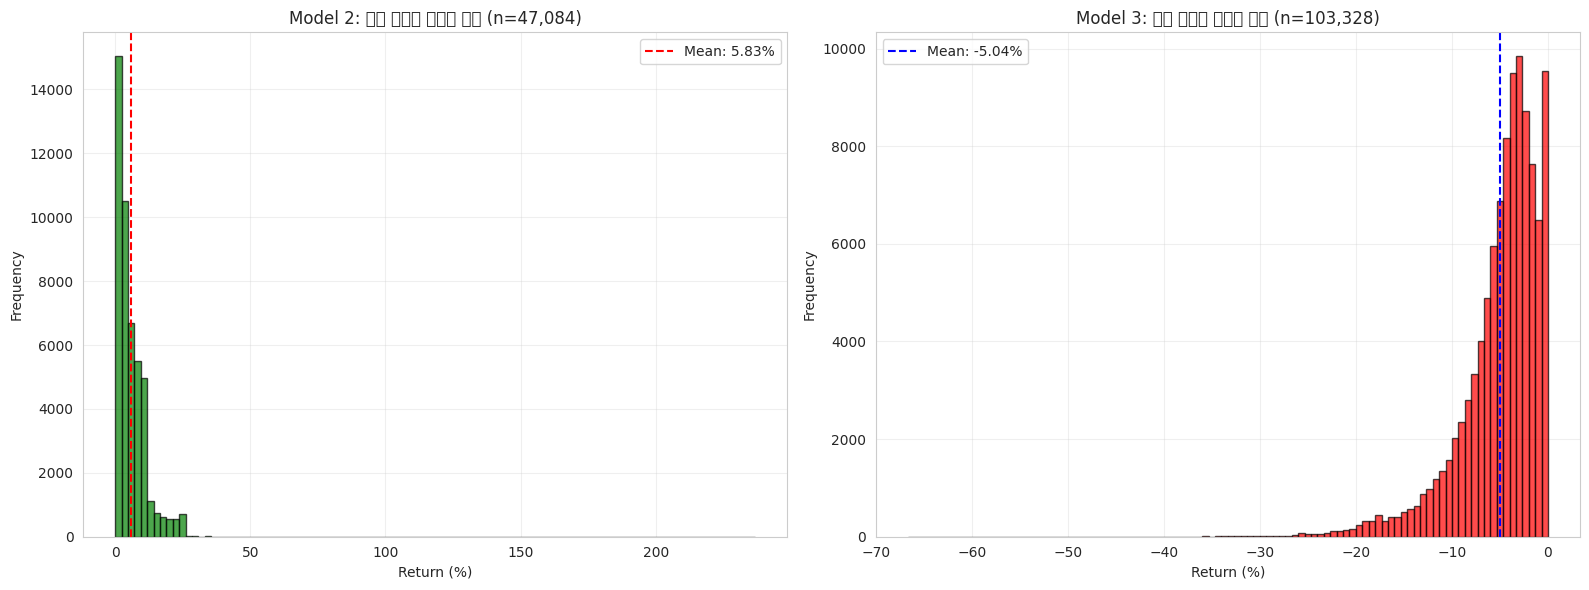

In [4]:
# 상승 케이스와 하락 케이스 분리
df_up = df_model[df_model['target_direction'] == 1].copy()  # 상승 (종가 > 시가)
df_down = df_model[df_model['target_direction'] == 0].copy()  # 하락 (종가 ≤ 시가)

print("=" * 80)
print("데이터 분리 결과")
print("=" * 80)

print(f"\n전체 데이터: {len(df_model):,}")
print(f"  - 상승 케이스 (Model 2): {len(df_up):,} ({len(df_up)/len(df_model)*100:.1f}%)")
print(f"  - 하락 케이스 (Model 3): {len(df_down):,} ({len(df_down)/len(df_model)*100:.1f}%)")

print(f"\n상승 케이스 수익률 통계:")
print(df_up['target_return'].describe())

print(f"\n하락 케이스 수익률 통계:")
print(df_down['target_return'].describe())

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 상승 케이스 수익률 분포
axes[0].hist(df_up['target_return'], bins=100, edgecolor='black', alpha=0.7, color='green')
axes[0].axvline(df_up['target_return'].mean(), color='red', linestyle='--', 
                label=f"Mean: {df_up['target_return'].mean():.2f}%")
axes[0].set_xlabel('Return (%)')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Model 2: 상승 케이스 수익률 분포 (n={len(df_up):,})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 하락 케이스 수익률 분포
axes[1].hist(df_down['target_return'], bins=100, edgecolor='black', alpha=0.7, color='red')
axes[1].axvline(df_down['target_return'].mean(), color='blue', linestyle='--', 
                label=f"Mean: {df_down['target_return'].mean():.2f}%")
axes[1].set_xlabel('Return (%)')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Model 3: 하락 케이스 수익률 분포 (n={len(df_down):,})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Model 2: 상승 케이스 회귀 모델

상승한 케이스에서 **얼마나 상승하는지** 예측

### 3.1 데이터 분할 (랜덤 분할)

In [5]:
# Model 2: 상승 케이스 데이터 분할
X_up = df_up[available_features]
y_up = df_up[target_col]

# Train+Valid와 Test 분할 (90:10)
X_up_temp, X_up_test, y_up_temp, y_up_test = train_test_split(
    X_up, y_up, test_size=0.1, random_state=42
)

# Train과 Valid 분할 (80:10)
X_up_train, X_up_valid, y_up_train, y_up_valid = train_test_split(
    X_up_temp, y_up_temp, test_size=0.1111, random_state=42  # 0.9 * 0.1111 ≈ 0.1
)

print("=" * 80)
print("Model 2: 상승 케이스 데이터 분할 (랜덤)")
print("=" * 80)

print(f"\nTrain Set: {len(X_up_train):,} ({len(X_up_train)/len(X_up)*100:.1f}%)")
print(f"  평균 수익률: {y_up_train.mean():.2f}%")

print(f"\nValid Set: {len(X_up_valid):,} ({len(X_up_valid)/len(X_up)*100:.1f}%)")
print(f"  평균 수익률: {y_up_valid.mean():.2f}%")

print(f"\nTest Set: {len(X_up_test):,} ({len(X_up_test)/len(X_up)*100:.1f}%)")
print(f"  평균 수익률: {y_up_test.mean():.2f}%")

print("\n" + "=" * 80)
print("✅ 데이터 분할 완료")
print("=" * 80)

Model 2: 상승 케이스 데이터 분할 (랜덤)

Train Set: 37,667 (80.0%)
  평균 수익률: 5.85%

Valid Set: 4,708 (10.0%)
  평균 수익률: 5.77%

Test Set: 4,709 (10.0%)
  평균 수익률: 5.74%

✅ 데이터 분할 완료


### 3.2 모델 학습 및 평가

In [6]:
# 평가 함수 정의
def evaluate_regressor(y_true, y_pred, model_name, dataset_name="Test"):
    """회귀 모델 평가"""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    # MAPE (절댓값 평균 오차율)
    # 주의: y_true가 0에 가까운 경우 MAPE가 매우 커질 수 있음
    # 여기서는 y_true의 절댓값이 0.1 이상인 경우만 계산
    valid_mask = np.abs(y_true) > 0.1
    if valid_mask.sum() > 0:
        mape = mean_absolute_percentage_error(y_true[valid_mask], y_pred[valid_mask])
    else:
        mape = np.nan
    
    # 방향 일치율 (예측 부호와 실제 부호 일치)
    direction_accuracy = np.mean(np.sign(y_true) == np.sign(y_pred)) * 100
    
    print(f"\n{model_name} - {dataset_name} Set 평가:")
    print(f"  MAE:  {mae:.4f}%")
    print(f"  RMSE: {rmse:.4f}%")
    print(f"  MAPE: {mape:.4f}" if not np.isnan(mape) else "  MAPE: N/A")
    print(f"  R²:   {r2:.4f}")
    print(f"  방향 일치율: {direction_accuracy:.2f}%")
    
    return {
        'model': model_name,
        'dataset': dataset_name,
        'mae': mae,
        'rmse': rmse,
        'mape': mape,
        'r2': r2,
        'direction_accuracy': direction_accuracy
    }

print("✓ 평가 함수 정의 완료")

✓ 평가 함수 정의 완료


In [7]:
# Model 2 결과 저장용
model2_results = []
model2_models = {}

print("=" * 80)
print("Model 2: 상승 케이스 회귀 모델 학습")
print("=" * 80)

Model 2: 상승 케이스 회귀 모델 학습


#### 3.2.1 Random Forest Regressor

In [8]:
print("\n[1/4] Random Forest Regressor 학습...")

rf_regressor = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

rf_regressor.fit(X_up_train, y_up_train)

# 예측
y_up_train_pred_rf = rf_regressor.predict(X_up_train)
y_up_valid_pred_rf = rf_regressor.predict(X_up_valid)
y_up_test_pred_rf = rf_regressor.predict(X_up_test)

# 평가
result_train = evaluate_regressor(y_up_train, y_up_train_pred_rf, "RandomForest", "Train")
result_valid = evaluate_regressor(y_up_valid, y_up_valid_pred_rf, "RandomForest", "Valid")
result_test = evaluate_regressor(y_up_test, y_up_test_pred_rf, "RandomForest", "Test")

model2_results.extend([result_train, result_valid, result_test])
model2_models['RandomForest'] = rf_regressor

print("\n✓ Random Forest 학습 완료")


[1/4] Random Forest Regressor 학습...

RandomForest - Train Set 평가:
  MAE:  3.0741%
  RMSE: 4.2583%
  MAPE: 1.9920
  R²:   0.4188
  방향 일치율: 100.00%

RandomForest - Valid Set 평가:
  MAE:  3.7753%
  RMSE: 5.6601%
  MAPE: 2.4375
  R²:   0.1079
  방향 일치율: 100.00%

RandomForest - Test Set 평가:
  MAE:  3.7663%
  RMSE: 5.1543%
  MAPE: 2.4969
  R²:   0.1024
  방향 일치율: 100.00%

✓ Random Forest 학습 완료


#### 3.2.2 XGBoost Regressor

In [9]:
if HAS_XGB:
    print("\n[2/4] XGBoost Regressor 학습...")
    
    xgb_regressor = xgb.XGBRegressor(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        min_child_weight=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        verbosity=0
    )
    
    xgb_regressor.fit(X_up_train, y_up_train)
    
    # 예측
    y_up_train_pred_xgb = xgb_regressor.predict(X_up_train)
    y_up_valid_pred_xgb = xgb_regressor.predict(X_up_valid)
    y_up_test_pred_xgb = xgb_regressor.predict(X_up_test)
    
    # 평가
    result_train = evaluate_regressor(y_up_train, y_up_train_pred_xgb, "XGBoost", "Train")
    result_valid = evaluate_regressor(y_up_valid, y_up_valid_pred_xgb, "XGBoost", "Valid")
    result_test = evaluate_regressor(y_up_test, y_up_test_pred_xgb, "XGBoost", "Test")
    
    model2_results.extend([result_train, result_valid, result_test])
    model2_models['XGBoost'] = xgb_regressor
    
    print("\n✓ XGBoost 학습 완료")
else:
    print("\n[2/4] XGBoost 건너뜀 (설치되지 않음)")


[2/4] XGBoost Regressor 학습...

XGBoost - Train Set 평가:
  MAE:  3.0213%
  RMSE: 4.0444%
  MAPE: 1.9651
  R²:   0.4757
  방향 일치율: 99.98%

XGBoost - Valid Set 평가:
  MAE:  3.8311%
  RMSE: 5.7276%
  MAPE: 2.4308
  R²:   0.0865
  방향 일치율: 99.98%

XGBoost - Test Set 평가:
  MAE:  3.8190%
  RMSE: 5.3237%
  MAPE: 2.4949
  R²:   0.0425
  방향 일치율: 100.00%

✓ XGBoost 학습 완료


#### 3.2.3 LightGBM Regressor

In [10]:
if HAS_LGB:
    print("\n[3/4] LightGBM Regressor 학습...")
    
    lgb_regressor = lgb.LGBMRegressor(
        n_estimators=300,
        max_depth=15,
        learning_rate=0.1,
        num_leaves=31,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        verbosity=-1
    )
    
    lgb_regressor.fit(X_up_train, y_up_train)
    
    # 예측
    y_up_train_pred_lgb = lgb_regressor.predict(X_up_train)
    y_up_valid_pred_lgb = lgb_regressor.predict(X_up_valid)
    y_up_test_pred_lgb = lgb_regressor.predict(X_up_test)
    
    # 평가
    result_train = evaluate_regressor(y_up_train, y_up_train_pred_lgb, "LightGBM", "Train")
    result_valid = evaluate_regressor(y_up_valid, y_up_valid_pred_lgb, "LightGBM", "Valid")
    result_test = evaluate_regressor(y_up_test, y_up_test_pred_lgb, "LightGBM", "Test")
    
    model2_results.extend([result_train, result_valid, result_test])
    model2_models['LightGBM'] = lgb_regressor
    
    print("\n✓ LightGBM 학습 완료")
else:
    print("\n[3/4] LightGBM 건너뜀 (설치되지 않음)")


[3/4] LightGBM Regressor 학습...

LightGBM - Train Set 평가:
  MAE:  3.2190%
  RMSE: 4.3387%
  MAPE: 2.0963
  R²:   0.3967
  방향 일치율: 99.99%

LightGBM - Valid Set 평가:
  MAE:  3.8294%
  RMSE: 5.8011%
  MAPE: 2.4411
  R²:   0.0629
  방향 일치율: 100.00%

LightGBM - Test Set 평가:
  MAE:  3.8113%
  RMSE: 5.2504%
  MAPE: 2.5149
  R²:   0.0687
  방향 일치율: 100.00%

✓ LightGBM 학습 완료


#### 3.2.4 Ridge Regression (베이스라인)

In [11]:
print("\n[4/4] Ridge Regression 학습...")

ridge_regressor = Ridge(alpha=1.0, random_state=42)
ridge_regressor.fit(X_up_train, y_up_train)

# 예측
y_up_train_pred_ridge = ridge_regressor.predict(X_up_train)
y_up_valid_pred_ridge = ridge_regressor.predict(X_up_valid)
y_up_test_pred_ridge = ridge_regressor.predict(X_up_test)

# 평가
result_train = evaluate_regressor(y_up_train, y_up_train_pred_ridge, "Ridge", "Train")
result_valid = evaluate_regressor(y_up_valid, y_up_valid_pred_ridge, "Ridge", "Valid")
result_test = evaluate_regressor(y_up_test, y_up_test_pred_ridge, "Ridge", "Test")

model2_results.extend([result_train, result_valid, result_test])
model2_models['Ridge'] = ridge_regressor

print("\n✓ Ridge 학습 완료")


[4/4] Ridge Regression 학습...

Ridge - Train Set 평가:
  MAE:  3.9552%
  RMSE: 5.4614%
  MAPE: 2.5759
  R²:   0.0440
  방향 일치율: 100.00%

Ridge - Valid Set 평가:
  MAE:  3.9445%
  RMSE: 5.8242%
  MAPE: 2.6415
  R²:   0.0554
  방향 일치율: 100.00%

Ridge - Test Set 평가:
  MAE:  3.9376%
  RMSE: 5.3353%
  MAPE: 2.6623
  R²:   0.0383
  방향 일치율: 100.00%

✓ Ridge 학습 완료


### 3.3 Model 2 성능 비교

Model 2: 상승 케이스 회귀 모델 성능 비교

[Test Set 성능]
       model      mae     rmse       r2  direction_accuracy
RandomForest 3.766302 5.154298 0.102444               100.0
    LightGBM 3.811332 5.250366 0.068674               100.0
     XGBoost 3.819015 5.323665 0.042489               100.0
       Ridge 3.937628 5.335324 0.038290               100.0

✅ 최고 성능 모델: RandomForest (MAE 기준)


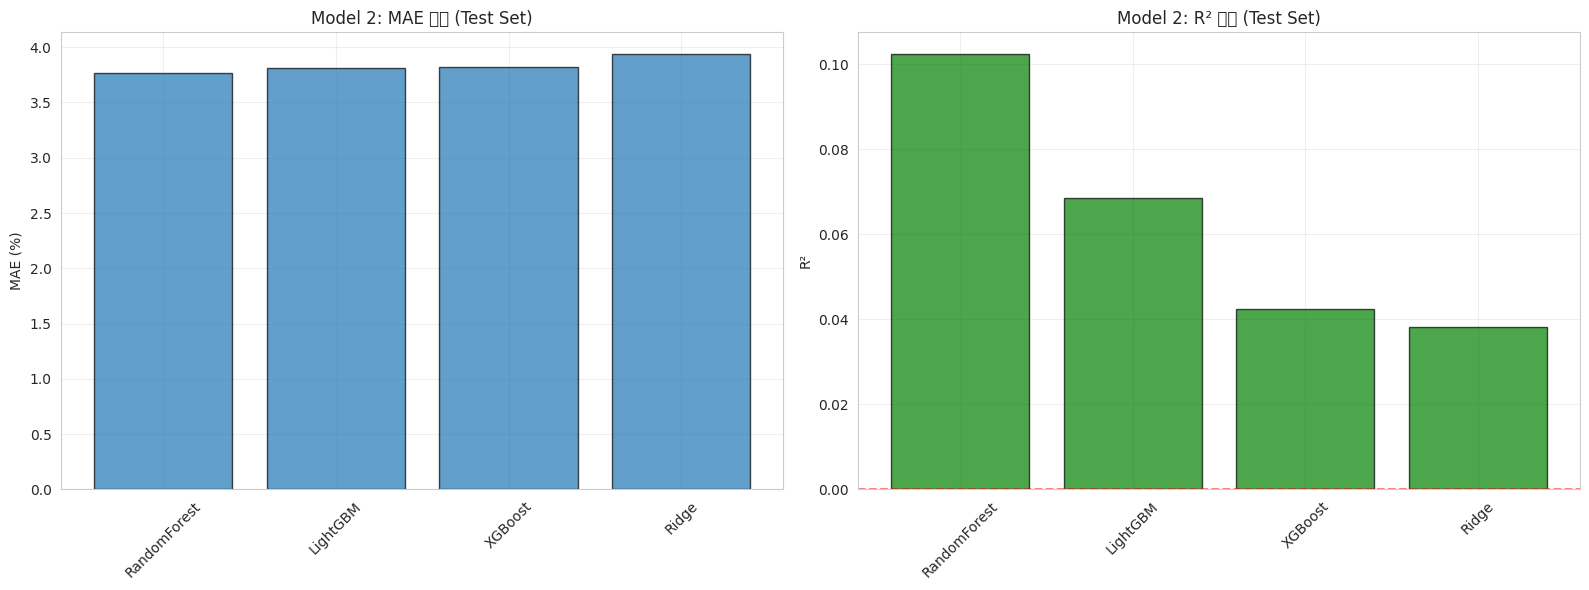

In [12]:
# 결과 DataFrame으로 정리
df_model2_results = pd.DataFrame(model2_results)

print("=" * 80)
print("Model 2: 상승 케이스 회귀 모델 성능 비교")
print("=" * 80)

# Test Set 결과만 출력
df_model2_test = df_model2_results[df_model2_results['dataset'] == 'Test'].copy()
df_model2_test = df_model2_test.sort_values('mae')

print("\n[Test Set 성능]")
print(df_model2_test[['model', 'mae', 'rmse', 'r2', 'direction_accuracy']].to_string(index=False))

# 최고 성능 모델
best_model2_name = df_model2_test.iloc[0]['model']
print(f"\n✅ 최고 성능 모델: {best_model2_name} (MAE 기준)")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# MAE 비교
axes[0].bar(range(len(df_model2_test)), df_model2_test['mae'], alpha=0.7, edgecolor='black')
axes[0].set_xticks(range(len(df_model2_test)))
axes[0].set_xticklabels(df_model2_test['model'], rotation=45)
axes[0].set_ylabel('MAE (%)')
axes[0].set_title('Model 2: MAE 비교 (Test Set)')
axes[0].grid(True, alpha=0.3)

# R² 비교
axes[1].bar(range(len(df_model2_test)), df_model2_test['r2'], alpha=0.7, edgecolor='black', color='green')
axes[1].set_xticks(range(len(df_model2_test)))
axes[1].set_xticklabels(df_model2_test['model'], rotation=45)
axes[1].set_ylabel('R²')
axes[1].set_title('Model 2: R² 비교 (Test Set)')
axes[1].axhline(0, color='red', linestyle='--', alpha=0.5)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.4 Model 2 예측 vs 실제 시각화

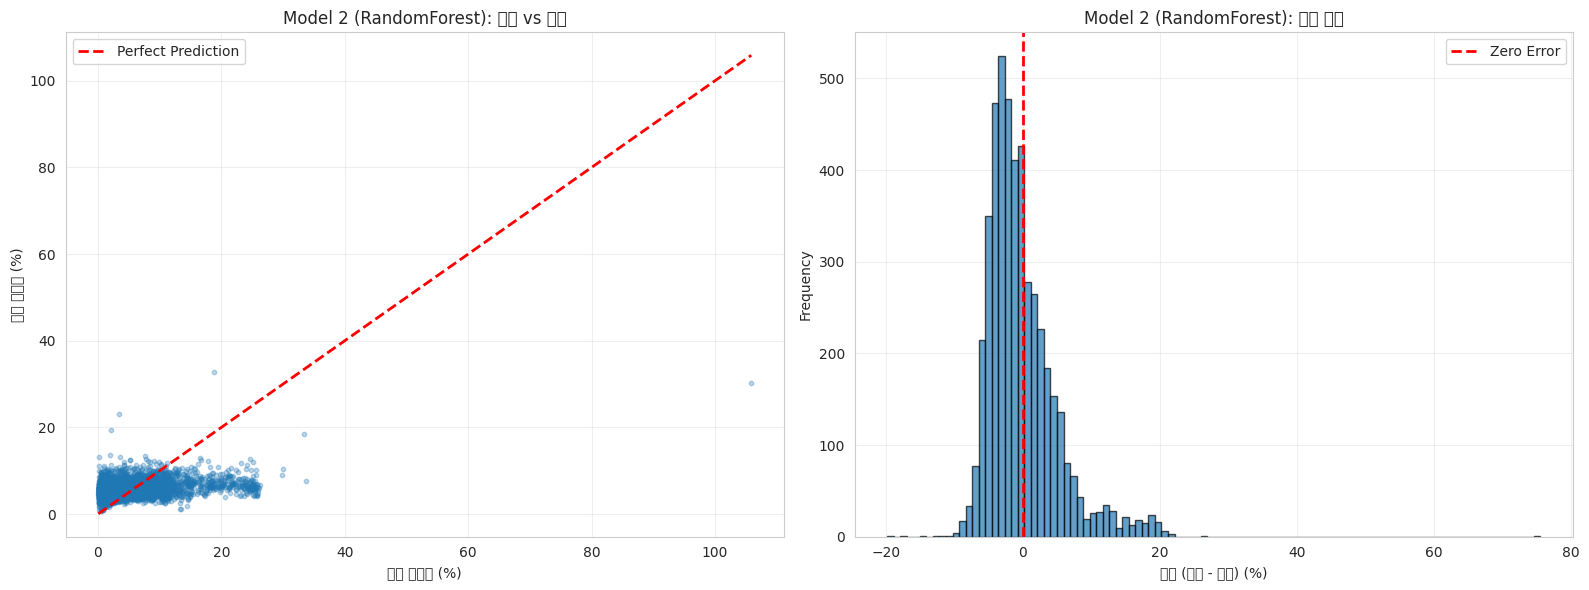

In [13]:
# 최고 성능 모델의 예측값 가져오기
best_model2 = model2_models[best_model2_name]
y_up_test_pred_best = best_model2.predict(X_up_test)

# 샘플링 (너무 많으면 느림)
sample_size = min(5000, len(y_up_test))
sample_idx = np.random.choice(len(y_up_test), sample_size, replace=False)

y_up_test_sample = y_up_test.iloc[sample_idx]
y_up_test_pred_sample = y_up_test_pred_best[sample_idx]

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 산점도
axes[0].scatter(y_up_test_sample, y_up_test_pred_sample, alpha=0.3, s=10)
axes[0].plot([y_up_test_sample.min(), y_up_test_sample.max()], 
             [y_up_test_sample.min(), y_up_test_sample.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('실제 수익률 (%)')
axes[0].set_ylabel('예측 수익률 (%)')
axes[0].set_title(f'Model 2 ({best_model2_name}): 예측 vs 실제')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 잔차 분포
residuals = y_up_test_sample - y_up_test_pred_sample
axes[1].hist(residuals, bins=100, edgecolor='black', alpha=0.7)
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[1].set_xlabel('잔차 (실제 - 예측) (%)')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Model 2 ({best_model2_name}): 잔차 분포')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.5 Model 2 Feature Importance

Model 2 (RandomForest): Feature Importance
            feature  importance
     prev_range_pct    0.125660
    market_gap_diff    0.124702
          atr_ratio    0.101159
            gap_pct    0.097362
       volume_ratio    0.090798
        prev_return    0.065934
          return_5d    0.053535
  prev_upper_shadow    0.051860
  prev_lower_shadow    0.051584
             atr_14    0.046503
             rsi_14    0.046216
         return_20d    0.038747
 bollinger_position    0.030614
              month    0.028243
        day_of_week    0.016450
consecutive_up_days    0.010358
          above_ma5    0.005033
     is_month_start    0.004443
     ma5_ma20_cross    0.002921
       is_month_end    0.002730
         above_ma50    0.001838
     is_quarter_end    0.001736
         above_ma20    0.001576


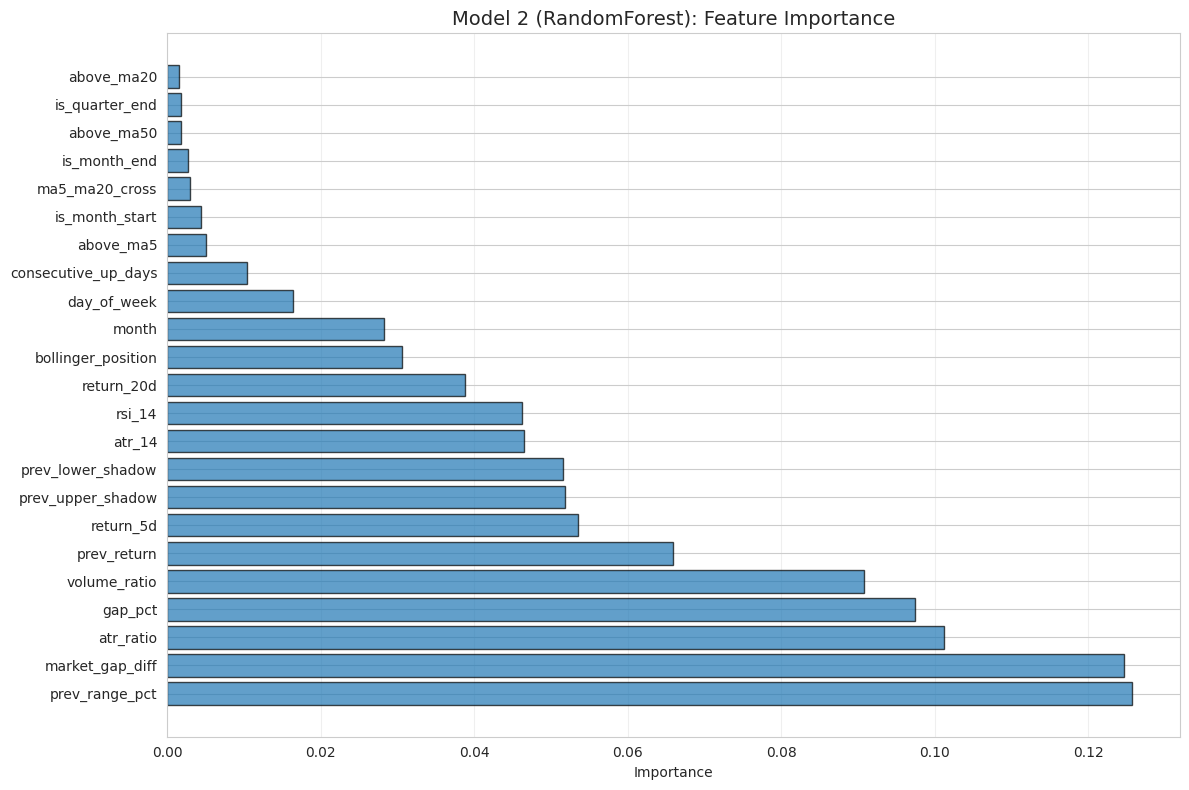


상위 10개 중요한 Features:
  prev_range_pct           : 0.1257
  market_gap_diff          : 0.1247
  atr_ratio                : 0.1012
  gap_pct                  : 0.0974
  volume_ratio             : 0.0908
  prev_return              : 0.0659
  return_5d                : 0.0535
  prev_upper_shadow        : 0.0519
  prev_lower_shadow        : 0.0516
  atr_14                   : 0.0465


In [14]:
# Tree 기반 모델의 Feature Importance
if best_model2_name in ['RandomForest', 'XGBoost', 'LightGBM']:
    if best_model2_name == 'RandomForest':
        feature_importance = best_model2.feature_importances_
    elif best_model2_name == 'XGBoost':
        feature_importance = best_model2.feature_importances_
    elif best_model2_name == 'LightGBM':
        feature_importance = best_model2.feature_importances_
    
    df_importance = pd.DataFrame({
        'feature': available_features,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    print("=" * 80)
    print(f"Model 2 ({best_model2_name}): Feature Importance")
    print("=" * 80)
    print(df_importance.to_string(index=False))
    
    # 시각화
    plt.figure(figsize=(12, max(8, len(df_importance) * 0.3)))
    plt.barh(range(len(df_importance)), df_importance['importance'], 
             alpha=0.7, edgecolor='black')
    plt.yticks(range(len(df_importance)), df_importance['feature'])
    plt.xlabel('Importance')
    plt.title(f'Model 2 ({best_model2_name}): Feature Importance', fontsize=14)
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
    
    print("\n상위 10개 중요한 Features:")
    for idx, row in df_importance.head(10).iterrows():
        print(f"  {row['feature']:25s}: {row['importance']:.4f}")
else:
    print(f"\n⚠ {best_model2_name}는 Feature Importance를 제공하지 않습니다.")

## 3-B. Model 2-1: 상승 케이스 고가 예측 모델

상승한 케이스에서 **고가까지 얼마나 상승하는지** 예측 (익절 전략용)

## 4. Model 3: 하락 케이스 회귀 모델

하락한 케이스에서 **얼마나 하락하는지** 예측

### 4.1 데이터 분할 (랜덤 분할)

In [15]:
# Model 3: 하락 케이스 데이터 분할
X_down = df_down[available_features]
y_down = df_down[target_col]

# Train+Valid와 Test 분할 (90:10)
X_down_temp, X_down_test, y_down_temp, y_down_test = train_test_split(
    X_down, y_down, test_size=0.1, random_state=42
)

# Train과 Valid 분할 (80:10)
X_down_train, X_down_valid, y_down_train, y_down_valid = train_test_split(
    X_down_temp, y_down_temp, test_size=0.1111, random_state=42
)

print("=" * 80)
print("Model 3: 하락 케이스 데이터 분할 (랜덤)")
print("=" * 80)

print(f"\nTrain Set: {len(X_down_train):,} ({len(X_down_train)/len(X_down)*100:.1f}%)")
print(f"  평균 손실률: {y_down_train.mean():.2f}%")

print(f"\nValid Set: {len(X_down_valid):,} ({len(X_down_valid)/len(X_down)*100:.1f}%)")
print(f"  평균 손실률: {y_down_valid.mean():.2f}%")

print(f"\nTest Set: {len(X_down_test):,} ({len(X_down_test)/len(X_down)*100:.1f}%)")
print(f"  평균 손실률: {y_down_test.mean():.2f}%")

print("\n" + "=" * 80)
print("✅ 데이터 분할 완료")
print("=" * 80)

Model 3: 하락 케이스 데이터 분할 (랜덤)

Train Set: 82,663 (80.0%)
  평균 손실률: -5.03%

Valid Set: 10,332 (10.0%)
  평균 손실률: -5.05%

Test Set: 10,333 (10.0%)
  평균 손실률: -5.04%

✅ 데이터 분할 완료


### 4.2 모델 학습 및 평가

In [16]:
# Model 3 결과 저장용
model3_results = []
model3_models = {}

print("=" * 80)
print("Model 3: 하락 케이스 회귀 모델 학습")
print("=" * 80)

Model 3: 하락 케이스 회귀 모델 학습


#### 4.2.1 Random Forest Regressor

In [17]:
print("\n[1/4] Random Forest Regressor 학습...")

rf_regressor_down = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

rf_regressor_down.fit(X_down_train, y_down_train)

# 예측
y_down_train_pred_rf = rf_regressor_down.predict(X_down_train)
y_down_valid_pred_rf = rf_regressor_down.predict(X_down_valid)
y_down_test_pred_rf = rf_regressor_down.predict(X_down_test)

# 평가
result_train = evaluate_regressor(y_down_train, y_down_train_pred_rf, "Random Forest", "Train")
result_valid = evaluate_regressor(y_down_valid, y_down_valid_pred_rf, "Random Forest", "Valid")
result_test = evaluate_regressor(y_down_test, y_down_test_pred_rf, "Random Forest", "Test")

model3_results.extend([result_train, result_valid, result_test])
model3_models['RandomForest'] = rf_regressor_down

print("\n✓ Random Forest 학습 완료")


[1/4] Random Forest Regressor 학습...

Random Forest - Train Set 평가:
  MAE:  2.1546%
  RMSE: 3.0279%
  MAPE: 0.9893
  R²:   0.5108
  방향 일치율: 94.84%

Random Forest - Valid Set 평가:
  MAE:  2.6687%
  RMSE: 3.7943%
  MAPE: 1.1804
  R²:   0.2349
  방향 일치율: 95.05%

Random Forest - Test Set 평가:
  MAE:  2.5703%
  RMSE: 3.6557%
  MAPE: 1.1545
  R²:   0.2753
  방향 일치율: 95.21%

✓ Random Forest 학습 완료


#### 4.2.2 XGBoost Regressor

In [18]:
if HAS_XGB:
    print("\n[2/4] XGBoost Regressor 학습...")
    
    xgb_regressor_down = xgb.XGBRegressor(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        min_child_weight=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        verbosity=0
    )
    
    xgb_regressor_down.fit(X_down_train, y_down_train)
    
    # 예측
    y_down_train_pred_xgb = xgb_regressor_down.predict(X_down_train)
    y_down_valid_pred_xgb = xgb_regressor_down.predict(X_down_valid)
    y_down_test_pred_xgb = xgb_regressor_down.predict(X_down_test)
    
    # 평가
    result_train = evaluate_regressor(y_down_train, y_down_train_pred_xgb, "XGBoost", "Train")
    result_valid = evaluate_regressor(y_down_valid, y_down_valid_pred_xgb, "XGBoost", "Valid")
    result_test = evaluate_regressor(y_down_test, y_down_test_pred_xgb, "XGBoost", "Test")
    
    model3_results.extend([result_train, result_valid, result_test])
    model3_models['XGBoost'] = xgb_regressor_down
    
    print("\n✓ XGBoost 학습 완료")
else:
    print("\n[2/4] XGBoost 건너뜀 (설치되지 않음)")


[2/4] XGBoost Regressor 학습...

XGBoost - Train Set 평가:
  MAE:  2.2909%
  RMSE: 3.1642%
  MAPE: 1.0666
  R²:   0.4658
  방향 일치율: 94.84%

XGBoost - Valid Set 평가:
  MAE:  2.6565%
  RMSE: 3.7835%
  MAPE: 1.1692
  R²:   0.2392
  방향 일치율: 95.05%

XGBoost - Test Set 평가:
  MAE:  2.5575%
  RMSE: 3.6468%
  MAPE: 1.1359
  R²:   0.2789
  방향 일치율: 95.20%

✓ XGBoost 학습 완료


#### 4.2.3 LightGBM Regressor

In [19]:
if HAS_LGB:
    print("\n[3/4] LightGBM Regressor 학습...")
    
    lgb_regressor_down = lgb.LGBMRegressor(
        n_estimators=300,
        max_depth=15,
        learning_rate=0.1,
        num_leaves=31,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        verbosity=-1
    )
    
    lgb_regressor_down.fit(X_down_train, y_down_train)
    
    # 예측
    y_down_train_pred_lgb = lgb_regressor_down.predict(X_down_train)
    y_down_valid_pred_lgb = lgb_regressor_down.predict(X_down_valid)
    y_down_test_pred_lgb = lgb_regressor_down.predict(X_down_test)
    
    # 평가
    result_train = evaluate_regressor(y_down_train, y_down_train_pred_lgb, "LightGBM", "Train")
    result_valid = evaluate_regressor(y_down_valid, y_down_valid_pred_lgb, "LightGBM", "Valid")
    result_test = evaluate_regressor(y_down_test, y_down_test_pred_lgb, "LightGBM", "Test")
    
    model3_results.extend([result_train, result_valid, result_test])
    model3_models['LightGBM'] = lgb_regressor_down
    
    print("\n✓ LightGBM 학습 완료")
else:
    print("\n[3/4] LightGBM 건너뜀 (설치되지 않음)")


[3/4] LightGBM Regressor 학습...

LightGBM - Train Set 평가:
  MAE:  2.3808%
  RMSE: 3.3089%
  MAPE: 1.0987
  R²:   0.4158
  방향 일치율: 94.84%

LightGBM - Valid Set 평가:
  MAE:  2.6508%
  RMSE: 3.7620%
  MAPE: 1.1700
  R²:   0.2478
  방향 일치율: 95.05%

LightGBM - Test Set 평가:
  MAE:  2.5628%
  RMSE: 3.6564%
  MAPE: 1.1405
  R²:   0.2751
  방향 일치율: 95.21%

✓ LightGBM 학습 완료


#### 4.2.4 Ridge Regression (베이스라인)

In [20]:
print("\n[4/4] Ridge Regression 학습...")

ridge_regressor_down = Ridge(alpha=1.0, random_state=42)
ridge_regressor_down.fit(X_down_train, y_down_train)

# 예측
y_down_train_pred_ridge = ridge_regressor_down.predict(X_down_train)
y_down_valid_pred_ridge = ridge_regressor_down.predict(X_down_valid)
y_down_test_pred_ridge = ridge_regressor_down.predict(X_down_test)

# 평가
result_train = evaluate_regressor(y_down_train, y_down_train_pred_ridge, "Ridge", "Train")
result_valid = evaluate_regressor(y_down_valid, y_down_valid_pred_ridge, "Ridge", "Valid")
result_test = evaluate_regressor(y_down_test, y_down_test_pred_ridge, "Ridge", "Test")

model3_results.extend([result_train, result_valid, result_test])
model3_models['Ridge'] = ridge_regressor_down

print("\n✓ Ridge 학습 완료")


[4/4] Ridge Regression 학습...

Ridge - Train Set 평가:
  MAE:  2.7692%
  RMSE: 3.9416%
  MAPE: 1.1921
  R²:   0.1710
  방향 일치율: 94.83%

Ridge - Valid Set 평가:
  MAE:  2.8004%
  RMSE: 3.9590%
  MAPE: 1.1977
  R²:   0.1670
  방향 일치율: 95.03%

Ridge - Test Set 평가:
  MAE:  2.7177%
  RMSE: 3.8706%
  MAPE: 1.1638
  R²:   0.1876
  방향 일치율: 95.20%

✓ Ridge 학습 완료


In [ ]:
# 모델 저장 경로
model_dir = Path("../models/regressor")
model_dir.mkdir(parents=True, exist_ok=True)

# Model 2 저장 (상승 케이스 - 종가)
model2_path = model_dir / "model_2_regressor_up.pkl"
model2_metadata = {
    'model': best_model2,
    'model_name': best_model2_name,
    'features': available_features,
    'target': 'target_return',
    'split_method': 'random',
    'split_ratio': '80:10:10',
    'test_metrics': df_model2_test[df_model2_test['model'] == best_model2_name].iloc[0].to_dict(),
    'created_at': datetime.now().isoformat()
}
joblib.dump(model2_metadata, model2_path)

# Model 2-1 저장 (상승 케이스 - 고가)
if target_max_col in df_up.columns and len(model2_1_results) > 0:
    model2_1_path = model_dir / "model_2_1_regressor_up_max.pkl"
    model2_1_metadata = {
        'model': best_model2_1,
        'model_name': best_model2_1_name,
        'features': available_features,
        'target': 'target_max_return',
        'split_method': 'random',
        'split_ratio': '80:10:10',
        'test_metrics': df_model2_1_test[df_model2_1_test['model'] == best_model2_1_name].iloc[0].to_dict(),
        'created_at': datetime.now().isoformat()
    }
    joblib.dump(model2_1_metadata, model2_1_path)

# Model 3 저장 (하락 케이스)
model3_path = model_dir / "model_3_regressor_down.pkl"
model3_metadata = {
    'model': best_model3,
    'model_name': best_model3_name,
    'features': available_features,
    'target': 'target_return',
    'split_method': 'random',
    'split_ratio': '80:10:10',
    'test_metrics': df_model3_test[df_model3_test['model'] == best_model3_name].iloc[0].to_dict(),
    'created_at': datetime.now().isoformat()
}
joblib.dump(model3_metadata, model3_path)

print("=" * 80)
print("모델 저장 완료")
print("=" * 80)

print(f"\nModel 2 (상승 케이스 - 종가):")
print(f"  저장 경로: {model2_path}")
print(f"  파일 크기: {model2_path.stat().st_size / 1024 / 1024:.2f} MB")
print(f"  알고리즘: {best_model2_name}")
print(f"  Test MAE: {df_model2_test.iloc[0]['mae']:.4f}%")

if target_max_col in df_up.columns and len(model2_1_results) > 0:
    print(f"\nModel 2-1 (상승 케이스 - 고가):")
    print(f"  저장 경로: {model2_1_path}")
    print(f"  파일 크기: {model2_1_path.stat().st_size / 1024 / 1024:.2f} MB")
    print(f"  알고리즘: {best_model2_1_name}")
    print(f"  Test MAE: {df_model2_1_test.iloc[0]['mae']:.4f}%")

print(f"\nModel 3 (하락 케이스 - 종가):")
print(f"  저장 경로: {model3_path}")
print(f"  파일 크기: {model3_path.stat().st_size / 1024 / 1024:.2f} MB")
print(f"  알고리즘: {best_model3_name}")
print(f"  Test MAE: {df_model3_test.iloc[0]['mae']:.4f}%")

Model 3: 하락 케이스 회귀 모델 성능 비교

[Test Set 성능]
        model      mae     rmse       r2  direction_accuracy
      XGBoost 2.557477 3.646775 0.278861           95.199845
     LightGBM 2.562842 3.656386 0.275055           95.209523
Random Forest 2.570287 3.655676 0.275337           95.209523
        Ridge 2.717695 3.870648 0.187603           95.199845

✅ 최고 성능 모델: XGBoost (MAE 기준)


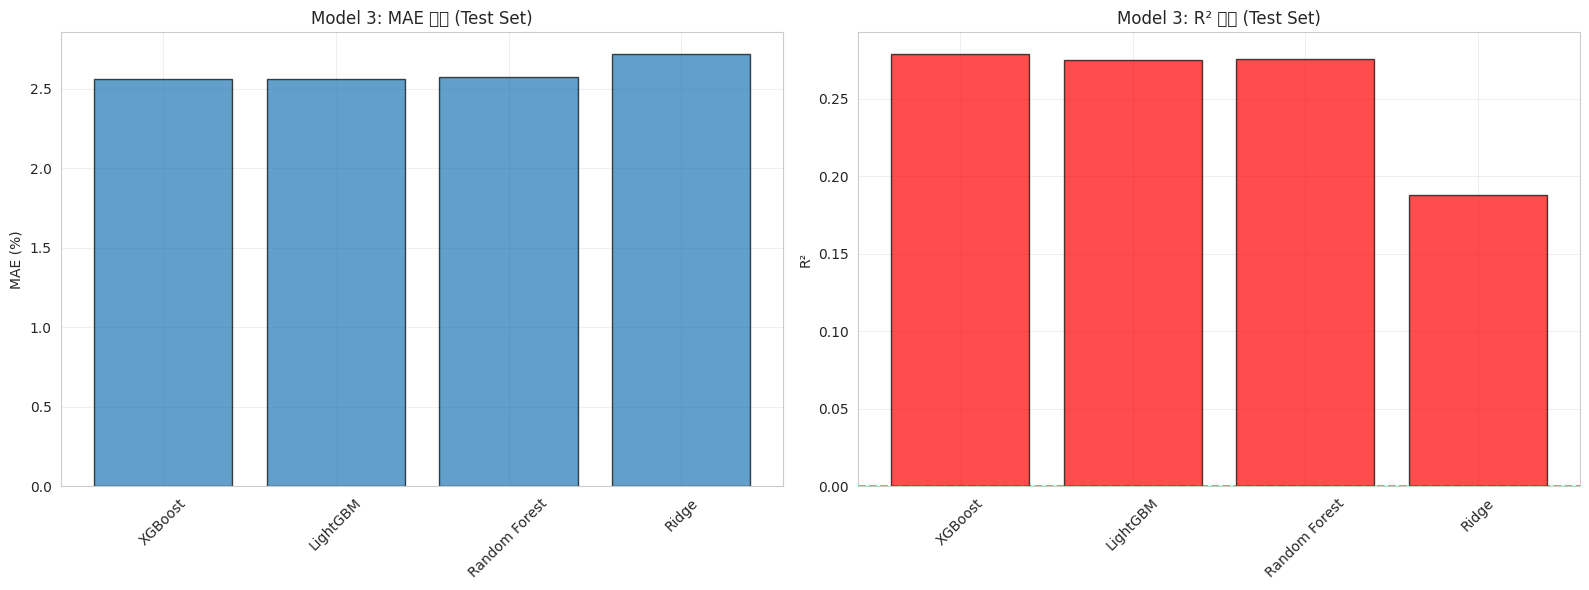

In [21]:
# 결과 DataFrame으로 정리
df_model3_results = pd.DataFrame(model3_results)

print("=" * 80)
print("Model 3: 하락 케이스 회귀 모델 성능 비교")
print("=" * 80)

# Test Set 결과만 출력
df_model3_test = df_model3_results[df_model3_results['dataset'] == 'Test'].copy()
df_model3_test = df_model3_test.sort_values('mae')

print("\n[Test Set 성능]")
print(df_model3_test[['model', 'mae', 'rmse', 'r2', 'direction_accuracy']].to_string(index=False))

# 최고 성능 모델
best_model3_name = df_model3_test.iloc[0]['model']
print(f"\n✅ 최고 성능 모델: {best_model3_name} (MAE 기준)")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# MAE 비교
axes[0].bar(range(len(df_model3_test)), df_model3_test['mae'], alpha=0.7, edgecolor='black')
axes[0].set_xticks(range(len(df_model3_test)))
axes[0].set_xticklabels(df_model3_test['model'], rotation=45)
axes[0].set_ylabel('MAE (%)')
axes[0].set_title('Model 3: MAE 비교 (Test Set)')
axes[0].grid(True, alpha=0.3)

# R² 비교
axes[1].bar(range(len(df_model3_test)), df_model3_test['r2'], alpha=0.7, edgecolor='black', color='red')
axes[1].set_xticks(range(len(df_model3_test)))
axes[1].set_xticklabels(df_model3_test['model'], rotation=45)
axes[1].set_ylabel('R²')
axes[1].set_title('Model 3: R² 비교 (Test Set)')
axes[1].axhline(0, color='red', linestyle='--', alpha=0.5)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("=" * 80)
print("Model 2, 2-1 & 3: 회귀 모델 학습 완료")
print("=" * 80)

print("\n1. 데이터")
print(f"   - 상승 케이스 (Model 2 & 2-1): {len(df_up):,} 샘플")
print(f"   - 하락 케이스 (Model 3): {len(df_down):,} 샘플")
print(f"   - Features: {len(available_features)}개")

print("\n2. Model 2 (상승 케이스 종가 수익률 예측)")
print(f"   - 최고 성능 모델: {best_model2_name}")
print(f"   - Test MAE: {df_model2_test.iloc[0]['mae']:.4f}%")
print(f"   - Test RMSE: {df_model2_test.iloc[0]['rmse']:.4f}%")
print(f"   - Test R²: {df_model2_test.iloc[0]['r2']:.4f}")

if target_max_col in df_up.columns and len(model2_1_results) > 0:
    print("\n2-1. Model 2-1 (상승 케이스 고가 수익률 예측) ⭐ 신규")
    print(f"   - 최고 성능 모델: {best_model2_1_name}")
    print(f"   - Test MAE: {df_model2_1_test.iloc[0]['mae']:.4f}%")
    print(f"   - Test RMSE: {df_model2_1_test.iloc[0]['rmse']:.4f}%")
    print(f"   - Test R²: {df_model2_1_test.iloc[0]['r2']:.4f}")
    print(f"   - 평균 고가 수익률: {y_up_max_test.mean():.2f}% (종가 대비 +{y_up_max_test.mean() - y_up_test.mean():.2f}%p)")

print("\n3. Model 3 (하락 케이스 손실률 예측)")
print(f"   - 최고 성능 모델: {best_model3_name}")
print(f"   - Test MAE: {df_model3_test.iloc[0]['mae']:.4f}%")
print(f"   - Test RMSE: {df_model3_test.iloc[0]['rmse']:.4f}%")
print(f"   - Test R²: {df_model3_test.iloc[0]['r2']:.4f}")

print("\n4. 핵심 인사이트")
if target_max_col in df_up.columns and len(model2_1_results) > 0:
    print(f"   - 상승 케이스: 평균 종가 수익률 {y_up_test.mean():.2f}%, 고가 수익률 {y_up_max_test.mean():.2f}%")
    print(f"   - 익절 전략 적용 시 추가 수익 기회: 평균 +{y_up_max_test.mean() - y_up_test.mean():.2f}%p")
    print(f"   - Model 2-1을 활용한 동적 익절가 설정 가능")

print("\n5. 다음 단계")
print("   - 06_modeling_stacking.ipynb: Stacking 앙상블 + 고가 예측 추가")
print("   - 통합 예측 시스템: P(up) × [E[close|up] + E[high|up]] + P(down) × E[close|down]")
print("   - 익절 전략: Model 2-1 예측값의 80% 수준에서 limit order")
print("   - 07_backtesting.ipynb: 백테스팅 시뮬레이션")

print("\n" + "=" * 80)
print("✓ 05_modeling_regressor.ipynb 완료")
print("=" * 80)

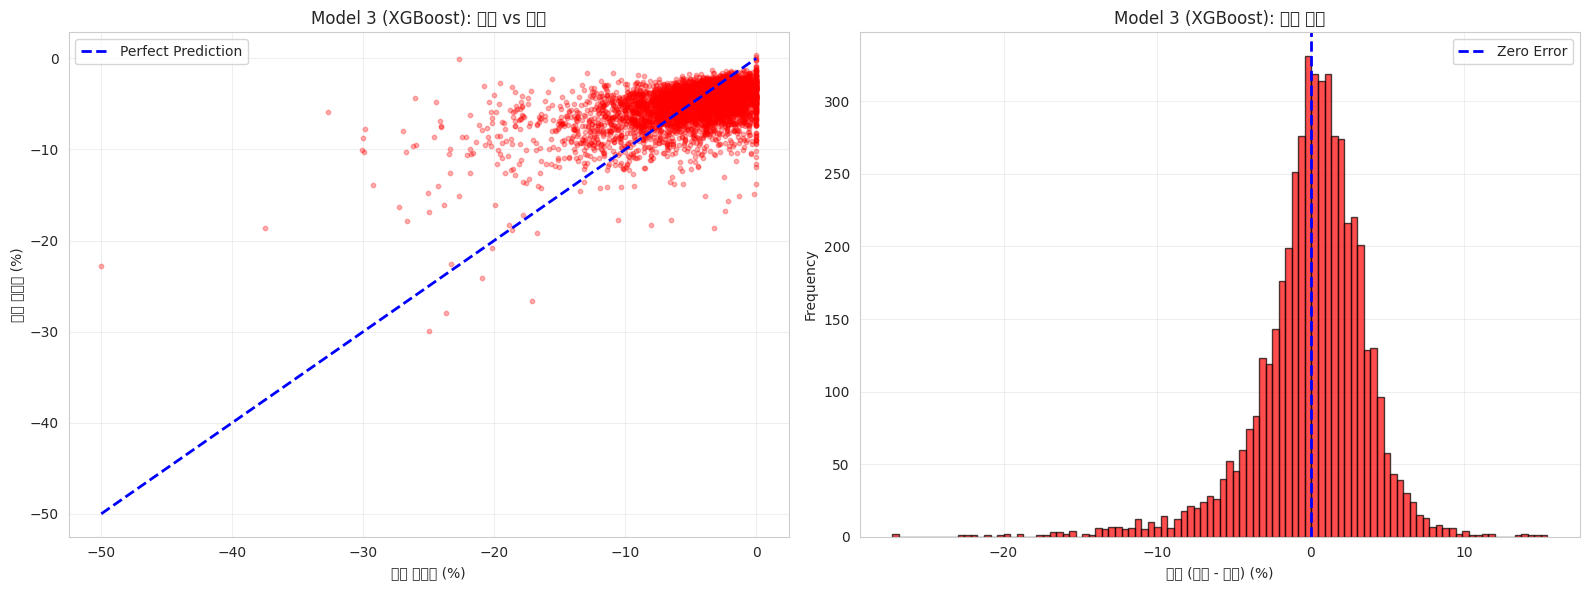

In [22]:
# 최고 성능 모델의 예측값 가져오기
best_model3 = model3_models[best_model3_name]
y_down_test_pred_best = best_model3.predict(X_down_test)

# 샘플링 (너무 많으면 느림)
sample_size = min(5000, len(y_down_test))
sample_idx = np.random.choice(len(y_down_test), sample_size, replace=False)

y_down_test_sample = y_down_test.iloc[sample_idx]
y_down_test_pred_sample = y_down_test_pred_best[sample_idx]

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 산점도
axes[0].scatter(y_down_test_sample, y_down_test_pred_sample, alpha=0.3, s=10, color='red')
axes[0].plot([y_down_test_sample.min(), y_down_test_sample.max()], 
             [y_down_test_sample.min(), y_down_test_sample.max()], 
             'b--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('실제 손실률 (%)')
axes[0].set_ylabel('예측 손실률 (%)')
axes[0].set_title(f'Model 3 ({best_model3_name}): 예측 vs 실제')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 잔차 분포
residuals = y_down_test_sample - y_down_test_pred_sample
axes[1].hist(residuals, bins=100, edgecolor='black', alpha=0.7, color='red')
axes[1].axvline(0, color='blue', linestyle='--', linewidth=2, label='Zero Error')
axes[1].set_xlabel('잔차 (실제 - 예측) (%)')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Model 3 ({best_model3_name}): 잔차 분포')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.5 Model 3 Feature Importance

Model 3 (XGBoost): Feature Importance
            feature  importance
    market_gap_diff    0.136909
            gap_pct    0.104039
     prev_range_pct    0.080182
     is_quarter_end    0.049334
          atr_ratio    0.047534
          above_ma5    0.045204
        prev_return    0.042757
       is_month_end    0.042341
  prev_lower_shadow    0.036048
  prev_upper_shadow    0.035752
       volume_ratio    0.035071
        day_of_week    0.032897
     ma5_ma20_cross    0.030519
             atr_14    0.030382
              month    0.029614
             rsi_14    0.029413
          return_5d    0.028692
         return_20d    0.028643
 bollinger_position    0.028427
consecutive_up_days    0.028422
     is_month_start    0.028205
         above_ma50    0.027844
         above_ma20    0.021770


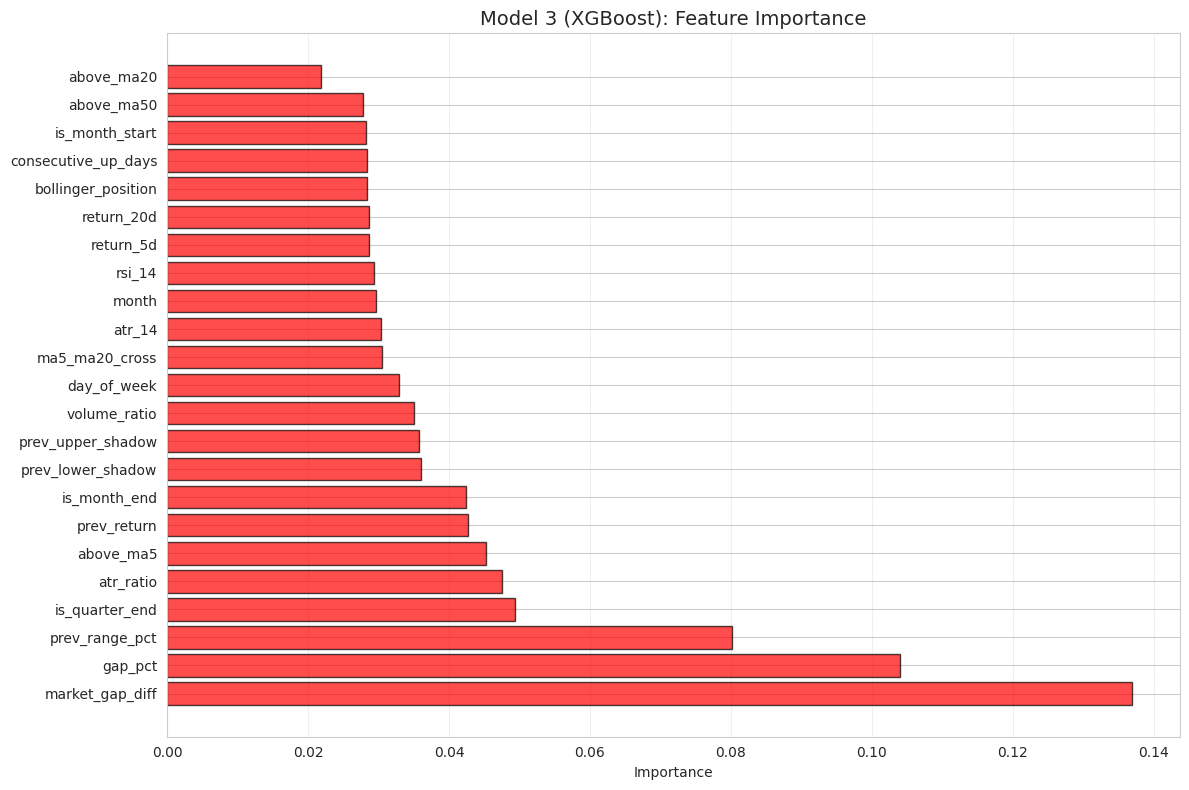


상위 10개 중요한 Features:
  market_gap_diff          : 0.1369
  gap_pct                  : 0.1040
  prev_range_pct           : 0.0802
  is_quarter_end           : 0.0493
  atr_ratio                : 0.0475
  above_ma5                : 0.0452
  prev_return              : 0.0428
  is_month_end             : 0.0423
  prev_lower_shadow        : 0.0360
  prev_upper_shadow        : 0.0358


In [23]:
# Tree 기반 모델의 Feature Importance
if best_model3_name in ['RandomForest', 'XGBoost', 'LightGBM']:
    if best_model3_name == 'RandomForest':
        feature_importance = best_model3.feature_importances_
    elif best_model3_name == 'XGBoost':
        feature_importance = best_model3.feature_importances_
    elif best_model3_name == 'LightGBM':
        feature_importance = best_model3.feature_importances_
    
    df_importance = pd.DataFrame({
        'feature': available_features,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    print("=" * 80)
    print(f"Model 3 ({best_model3_name}): Feature Importance")
    print("=" * 80)
    print(df_importance.to_string(index=False))
    
    # 시각화
    plt.figure(figsize=(12, max(8, len(df_importance) * 0.3)))
    plt.barh(range(len(df_importance)), df_importance['importance'], 
             alpha=0.7, edgecolor='black', color='red')
    plt.yticks(range(len(df_importance)), df_importance['feature'])
    plt.xlabel('Importance')
    plt.title(f'Model 3 ({best_model3_name}): Feature Importance', fontsize=14)
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
    
    print("\n상위 10개 중요한 Features:")
    for idx, row in df_importance.head(10).iterrows():
        print(f"  {row['feature']:25s}: {row['importance']:.4f}")
else:
    print(f"\n⚠ {best_model3_name}는 Feature Importance를 제공하지 않습니다.")

## 5. 모델 저장

In [ ]:
# 모델 저장 경로
model_dir = Path("../models/regressor")
model_dir.mkdir(parents=True, exist_ok=True)

# Model 2 저장 (상승 케이스)
model2_path = model_dir / "model_2_regressor_up.pkl"
model2_metadata = {
    'model': best_model2,
    'model_name': best_model2_name,
    'features': available_features,
    'split_method': 'random',
    'split_ratio': '80:10:10',
    'test_metrics': df_model2_test[df_model2_test['model'] == best_model2_name].iloc[0].to_dict(),
    'created_at': datetime.now().isoformat()
}
joblib.dump(model2_metadata, model2_path)

# Model 3 저장 (하락 케이스)
model3_path = model_dir / "model_3_regressor_down.pkl"
model3_metadata = {
    'model': best_model3,
    'model_name': best_model3_name,
    'features': available_features,
    'split_method': 'random',
    'split_ratio': '80:10:10',
    'test_metrics': df_model3_test[df_model3_test['model'] == best_model3_name].iloc[0].to_dict(),
    'created_at': datetime.now().isoformat()
}
joblib.dump(model3_metadata, model3_path)

print("=" * 80)
print("모델 저장 완료")
print("=" * 80)

print(f"\nModel 2 (상승 케이스):")
print(f"  저장 경로: {model2_path}")
print(f"  파일 크기: {model2_path.stat().st_size / 1024 / 1024:.2f} MB")
print(f"  알고리즘: {best_model2_name}")
print(f"  Test MAE: {df_model2_test.iloc[0]['mae']:.4f}%")

print(f"\nModel 3 (하락 케이스):")
print(f"  저장 경로: {model3_path}")
print(f"  파일 크기: {model3_path.stat().st_size / 1024 / 1024:.2f} MB")
print(f"  알고리즘: {best_model3_name}")
print(f"  Test MAE: {df_model3_test.iloc[0]['mae']:.4f}%")

## 6. 최종 요약

In [24]:
print("=" * 80)
print("Model 2 & 3: 회귀 모델 학습 완료")
print("=" * 80)

print("\n1. 데이터")
print(f"   - 상승 케이스 (Model 2): {len(df_up):,} 샘플")
print(f"   - 하락 케이스 (Model 3): {len(df_down):,} 샘플")
print(f"   - Features: {len(available_features)}개")

print("\n2. Model 2 (상승 케이스 수익률 예측)")
print(f"   - 최고 성능 모델: {best_model2_name}")
print(f"   - Test MAE: {df_model2_test.iloc[0]['mae']:.4f}%")
print(f"   - Test RMSE: {df_model2_test.iloc[0]['rmse']:.4f}%")
print(f"   - Test R²: {df_model2_test.iloc[0]['r2']:.4f}")

print("\n3. Model 3 (하락 케이스 손실률 예측)")
print(f"   - 최고 성능 모델: {best_model3_name}")
print(f"   - Test MAE: {df_model3_test.iloc[0]['mae']:.4f}%")
print(f"   - Test RMSE: {df_model3_test.iloc[0]['rmse']:.4f}%")
print(f"   - Test R²: {df_model3_test.iloc[0]['r2']:.4f}")

print("\n4. 다음 단계")
print("   - 06_model_integration.ipynb: 3개 모델 통합 (분류 + 회귀)")
print("   - 기대 수익률 계산: P(up) × E[r|up] + P(down) × E[r|down]")
print("   - 07_backtesting.ipynb: 백테스팅 시뮬레이션")

print("\n" + "=" * 80)
print("✓ 05_modeling_regressor.ipynb 완료")
print("=" * 80)

Model 2 & 3: 회귀 모델 학습 완료

1. 데이터
   - 상승 케이스 (Model 2): 47,084 샘플
   - 하락 케이스 (Model 3): 103,328 샘플
   - Features: 23개

2. Model 2 (상승 케이스 수익률 예측)
   - 최고 성능 모델: RandomForest
   - Test MAE: 3.7663%
   - Test RMSE: 5.1543%
   - Test R²: 0.1024

3. Model 3 (하락 케이스 손실률 예측)
   - 최고 성능 모델: XGBoost
   - Test MAE: 2.5575%
   - Test RMSE: 3.6468%
   - Test R²: 0.2789

4. 다음 단계
   - 06_model_integration.ipynb: 3개 모델 통합 (분류 + 회귀)
   - 기대 수익률 계산: P(up) × E[r|up] + P(down) × E[r|down]
   - 07_backtesting.ipynb: 백테스팅 시뮬레이션

✓ 05_modeling_regressor.ipynb 완료
